<a href="https://www.kaggle.com/code/utkarshx27/investigating-historical-nuclear-explosions?scriptVersionId=137958563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="color:#007BFF; font-size:36px;">Exploratory Data Analysis of Nuclear Explosions</h1>
<h2 style="color:#343A40; font-size:28px;">Investigating Historical Nuclear Explosions Prior to 2000</h2>

<p style="font-size:16px;">
In this Kaggle analysis, we delve into the historical data of nuclear explosions prior to the year 2000. The dataset provides information about the countries involved, regions of detonation, yield estimates, purposes, and more.
</p>

<p style="font-size:16px;">
Through data cleaning, preprocessing, and visualization, we aim to gain insights into the patterns, trends, and correlations within the nuclear testing data. We will explore the distribution of explosions by country and region, analyze the yield and magnitude of detonations, and investigate the preference for underground or above-ground testing.
</p>

<p style="font-size:16px;">
Moreover, we'll perform a country-specific analysis, comparing the nuclear testing patterns, yields, and purposes of detonation for specific countries, such as the USA and the USSR (Russia).
</p>

<p style="font-size:16px;">
Stay tuned as we uncover fascinating insights into this critical historical data!
</p>


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preprocessing

In [2]:
data = pd.read_csv('/kaggle/input/nuclear-explosions-data/nuclear_explosions.csv')
data.rename(columns={
    'Location.Country': 'Country',
    'Location.Region': 'Region',
    'Data.Source': 'Source',
    'Location.Cordinates.Latitude': 'Latitude',
    'Location.Cordinates.Longitude': 'Longitude',
    'Data.Magnitude.Body': 'Body_Magnitude',
    'Data.Magnitude.Surface': 'Surface_Magnitude',
    'Location.Cordinates.Depth': 'Depth_Km',
    'Data.Yeild.Lower': 'Yield_Lower_Kilotons',
    'Data.Yeild.Upper': 'Yield_Upper_Kilotons',
    'Data.Purpose': 'Purpose',
    'Data.Name': 'Name',
    'Data.Type': 'Type',
    'Date.Day': 'Day',
    'Date.Month': 'Month',
    'Date.Year': 'Year'
}, inplace=True)

In [3]:
print("Missing values before handling:")
print(data.isnull().sum())

mean_yield_lower = data['Yield_Lower_Kilotons'].mean()
mean_yield_upper = data['Yield_Upper_Kilotons'].mean()
data['Yield_Lower_Kilotons'].fillna(mean_yield_lower, inplace=True)
data['Yield_Upper_Kilotons'].fillna(mean_yield_upper, inplace=True)

data['Date'] = pd.to_datetime(data[['Day', 'Month', 'Year']], errors='coerce', dayfirst=False)

data.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)

data['Country'] = data['Country'].replace({'USSR': 'Russia', 'United States': 'USA'})

#data.to_csv('cleaned_nuclear_explosions_data.csv', index=False)

Missing values before handling:
Country                 0
Region                  0
Source                  0
Latitude                0
Longitude               0
Body_Magnitude          0
Surface_Magnitude       0
Depth_Km                0
Yield_Lower_Kilotons    0
Yield_Upper_Kilotons    0
Purpose                 0
Name                    0
Type                    0
Day                     0
Month                   0
Year                    0
dtype: int64


# Exploratory Data Analysis (EDA)

In [4]:
data.head(3)

,Country,Region,Source,Latitude,Longitude,Body_Magnitude,Surface_Magnitude,Depth_Km,Yield_Lower_Kilotons,Yield_Upper_Kilotons,Purpose,Name,Type,Date
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.1,21.0,21.0,Wr,Trinity,Tower,1945-07-16
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.6,15.0,15.0,Combat,Littleboy,Airdrop,1945-08-05
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.6,21.0,21.0,Combat,Fatman,Airdrop,1945-08-09


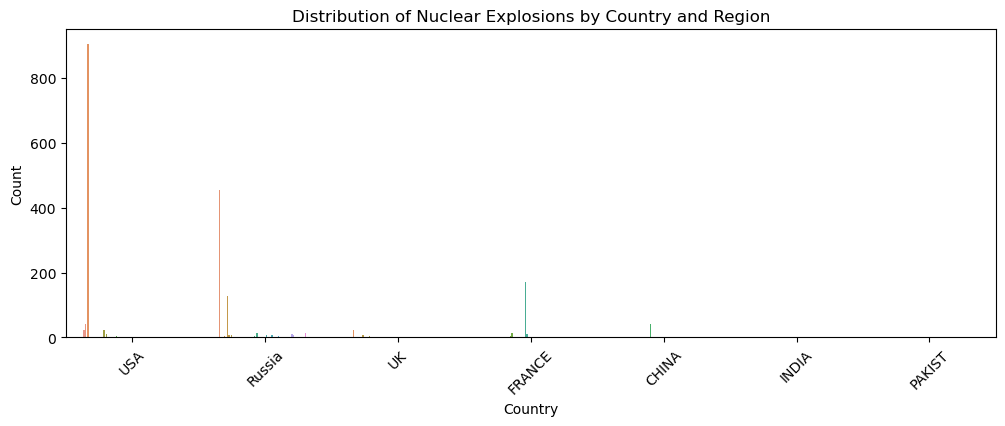

In [5]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Country', hue='Region', data=data)
plt.title('Distribution of Nuclear Explosions by Country and Region')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
#plt.legend(title='Region', loc='upper right')
plt.legend().set_visible(False)
plt.show()

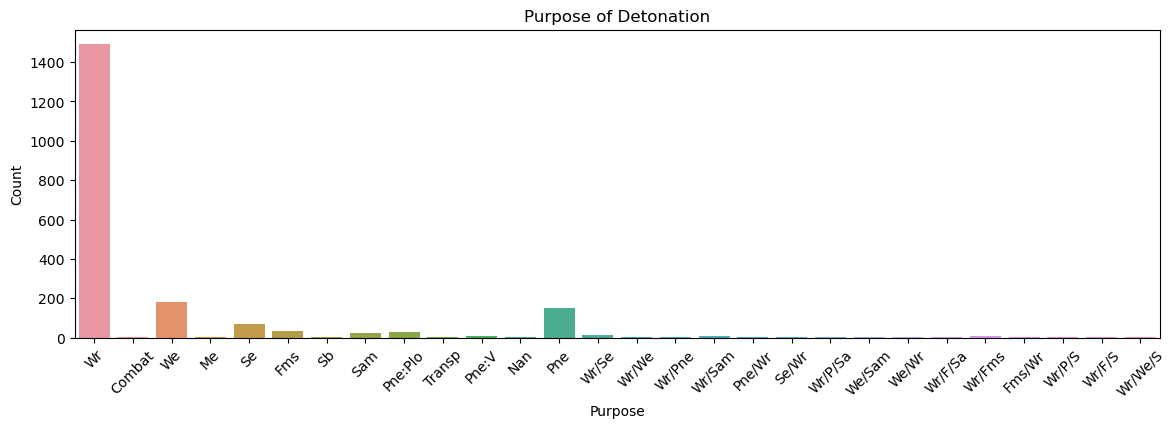

In [6]:
plt.figure(figsize=(14, 4))
sns.countplot(x='Purpose', data=data)
plt.title('Purpose of Detonation')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

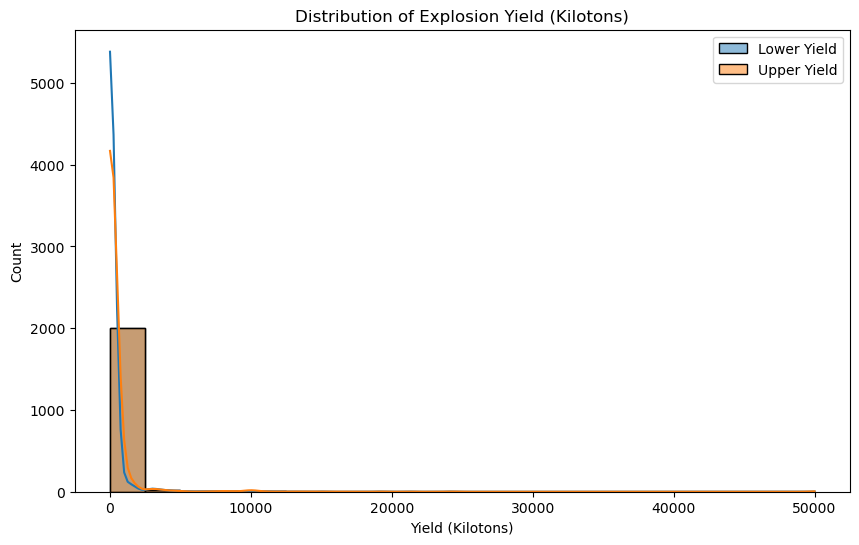

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Yield_Lower_Kilotons'], bins=20, kde=True, label='Lower Yield')
sns.histplot(data['Yield_Upper_Kilotons'], bins=20, kde=True, label='Upper Yield')
plt.title('Distribution of Explosion Yield (Kilotons)')
plt.xlabel('Yield (Kilotons)')
plt.ylabel('Count')
plt.legend()
plt.show()

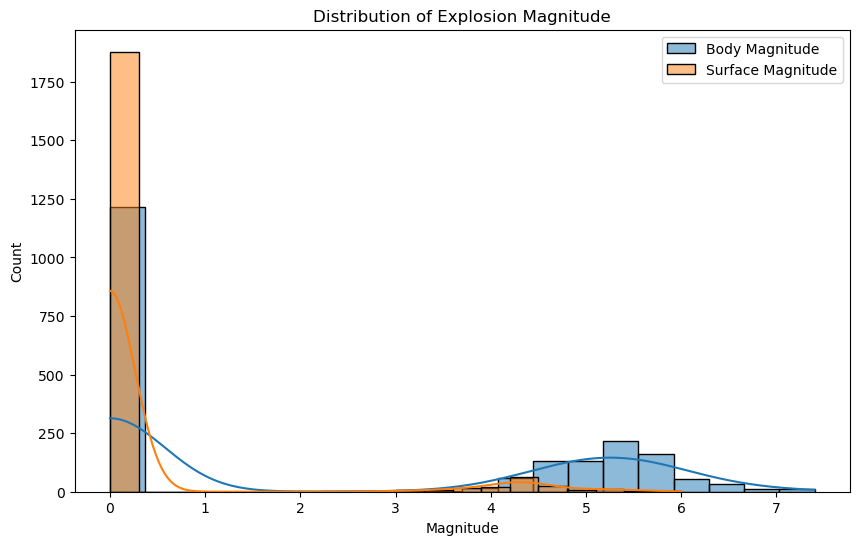

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Body_Magnitude'], bins=20, kde=True, label='Body Magnitude')
sns.histplot(data['Surface_Magnitude'], bins=20, kde=True, label='Surface Magnitude')
plt.title('Distribution of Explosion Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.legend()
plt.show()

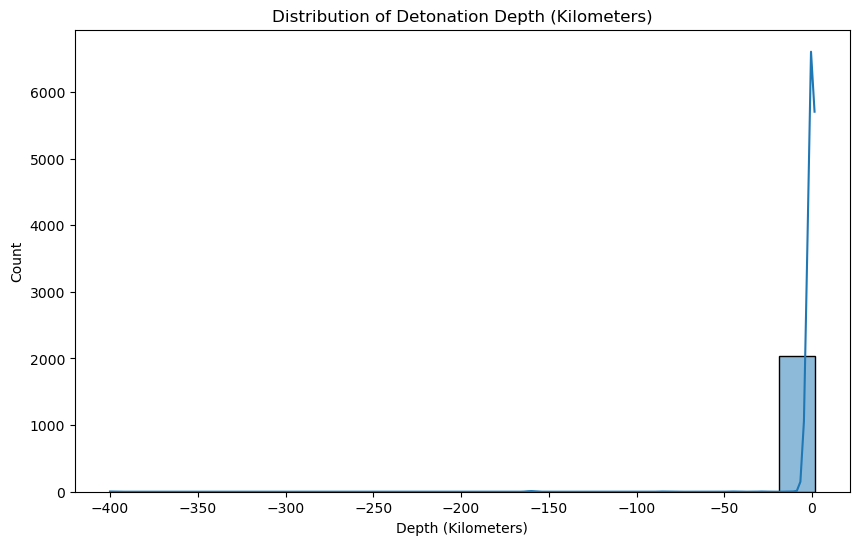

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Depth_Km'], bins=20, kde=True)
plt.title('Distribution of Detonation Depth (Kilometers)')
plt.xlabel('Depth (Kilometers)')
plt.ylabel('Count')
plt.show()

# Geospatial Analysis:

In [10]:
map_nuclear_explosions = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=3)

def get_color(purpose):    #Colour not working
    color_dict = {
        'COMBAT': 'red',
        'FMS': 'blue',
        'ME': 'green',
        'PNE': 'purple',
        'SAM': 'orange',
        'SSE': 'gray',
        'TRANSP': 'brown',
        'WE': 'pink',
        'WR': 'cyan'
    }
    return color_dict.get(purpose, 'black')

def get_icon(yield_upper):
    if yield_upper <= 50:
        return 'circle'
    elif yield_upper <= 200:
        return 'square'
    else:
        return 'star'
for index, row in data.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    purpose = row['Purpose']
    yield_upper = row['Yield_Upper_Kilotons']
    color = get_color(purpose)
    icon = get_icon(yield_upper)

    popup_text = f"Name: {row['Name']}<br>Country: {row['Country']}<br>Region: {row['Region']}<br>Purpose: {purpose}<br>Yield Upper (Kilotons): {yield_upper}"


    folium.Marker(
        location=[latitude, longitude],
        popup=popup_text,
        icon=folium.DivIcon(
            html=f'<div style="color: {color};"><i class="fa fa-{icon}"></i></div>',
            icon_size=(30, 30)
        )
    ).add_to(map_nuclear_explosions)


map_nuclear_explosions

# Temporal Analysis:

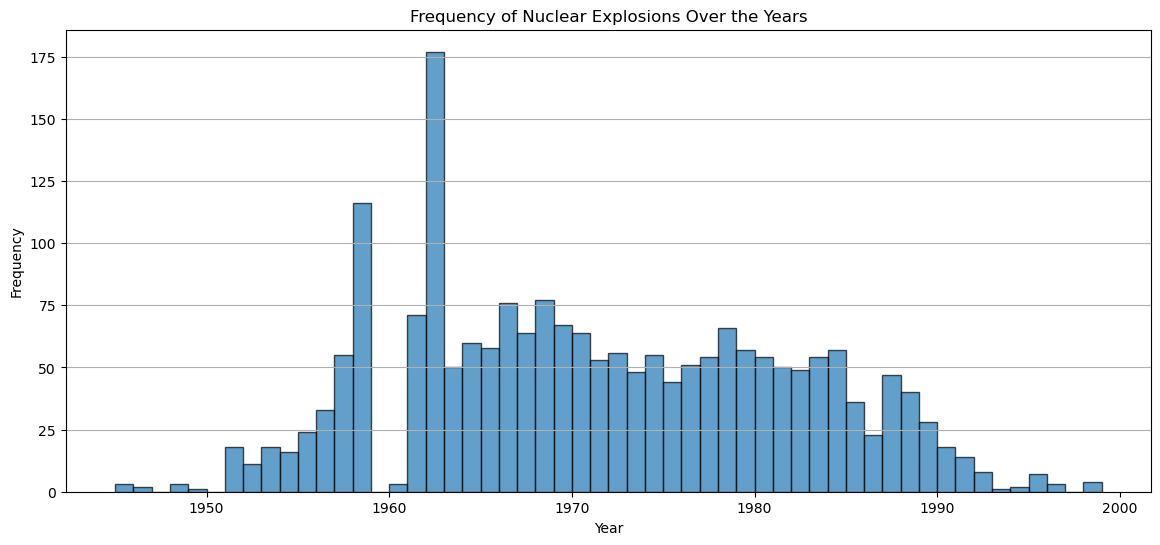

In [11]:
data['Year'] = data['Date'].dt.year
plt.figure(figsize=(14, 6))
plt.hist(data['Year'], bins=range(data['Year'].min(), data['Year'].max() + 2), edgecolor='black', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Nuclear Explosions Over the Years')
plt.grid(axis='y')
plt.show()

# Country-specific Analysis:      (USA vs USSR)

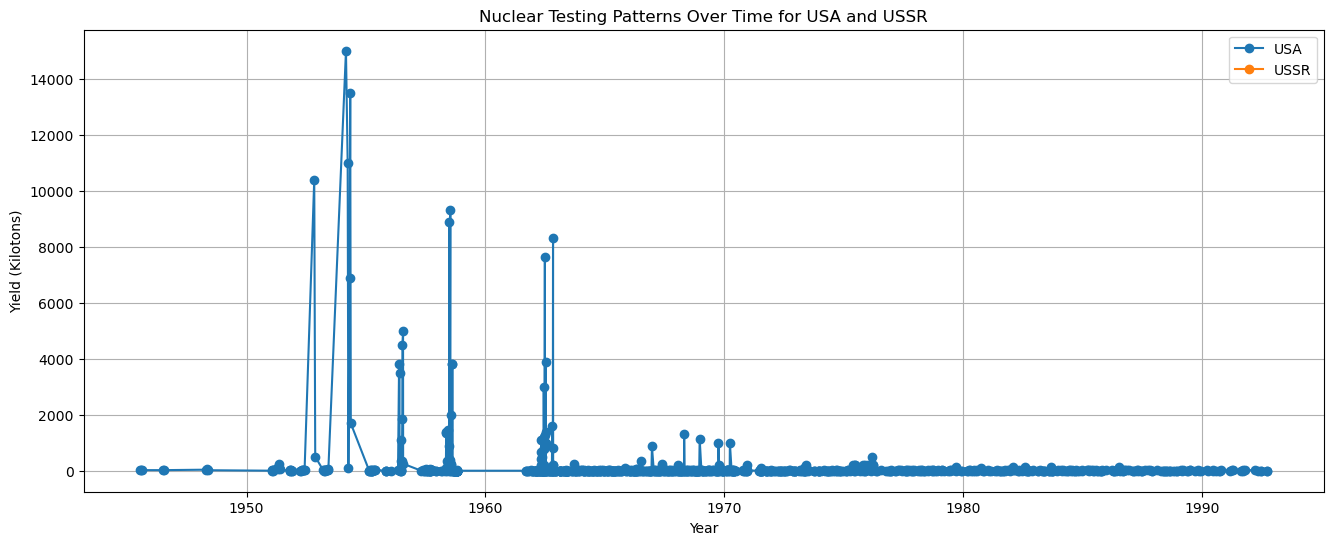

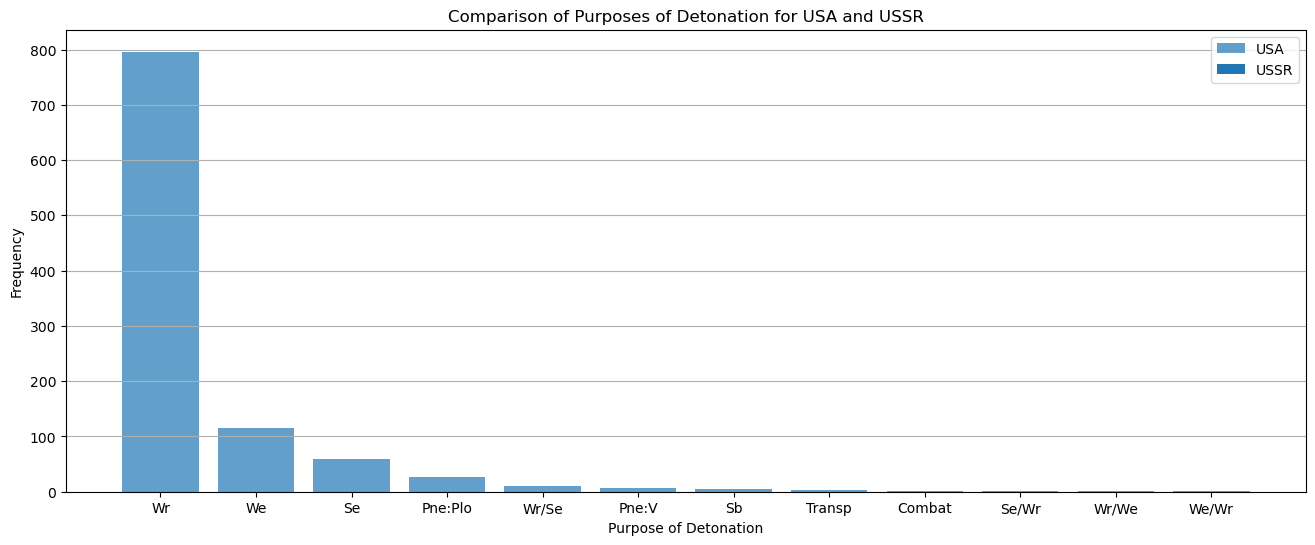

In [12]:
usa_data = data[data['Country'] == 'USA']
ussr_data = data[data['Country'] == 'USSR']

plt.figure(figsize=(16, 6))
plt.plot(usa_data['Date'], usa_data['Yield_Lower_Kilotons'], label='USA', marker='o')
plt.plot(ussr_data['Date'], ussr_data['Yield_Upper_Kilotons'], label='USSR', marker='o')
plt.xlabel('Year')
plt.ylabel('Yield (Kilotons)')
plt.title('Nuclear Testing Patterns Over Time for USA and USSR')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(16, 6))
usa_purpose_counts = usa_data['Purpose'].value_counts()
ussr_purpose_counts = ussr_data['Purpose'].value_counts()
plt.bar(usa_purpose_counts.index, usa_purpose_counts, label='USA', alpha=0.7)
plt.bar(ussr_purpose_counts.index, ussr_purpose_counts, label='USSR', alpha=0.7)
plt.xlabel('Purpose of Detonation')
plt.ylabel('Frequency')
plt.title('Comparison of Purposes of Detonation for USA and USSR')
plt.legend()
plt.grid(axis='y')
plt.show()

# Correlation

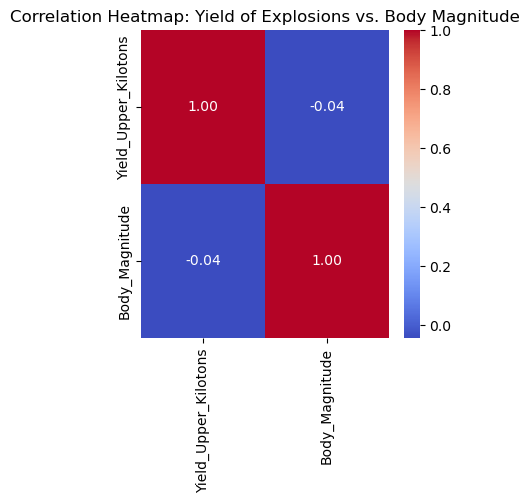

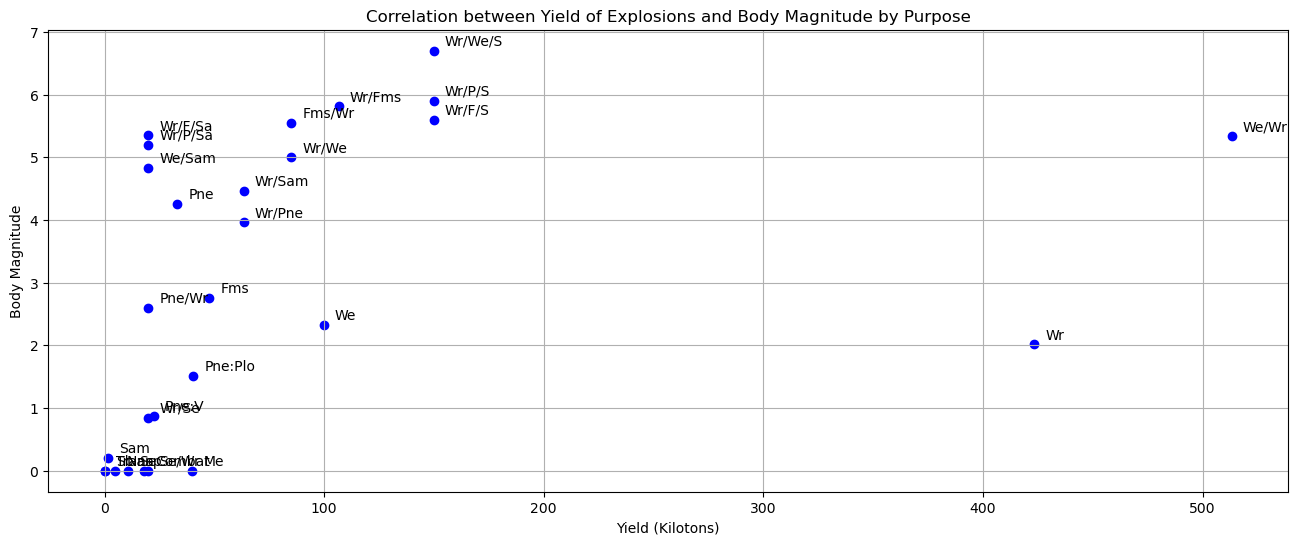

In [13]:
correlation_matrix = data[['Yield_Upper_Kilotons', 'Body_Magnitude']].corr()

plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Yield of Explosions vs. Body Magnitude')
plt.show()

purpose_correlation = data.groupby('Purpose').agg({'Yield_Upper_Kilotons': 'mean', 'Body_Magnitude': 'mean'}).reset_index()

plt.figure(figsize=(16, 6))
plt.scatter(purpose_correlation['Yield_Upper_Kilotons'], purpose_correlation['Body_Magnitude'], color='blue', marker='o')
plt.xlabel('Yield (Kilotons)')
plt.ylabel('Body Magnitude')
plt.title('Correlation between Yield of Explosions and Body Magnitude by Purpose')
for i, txt in enumerate(purpose_correlation['Purpose']):
    plt.annotate(txt, (purpose_correlation['Yield_Upper_Kilotons'][i], purpose_correlation['Body_Magnitude'][i]), xytext=(8,4), textcoords='offset points')
plt.grid()
plt.show()